In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
total = pd.read_csv('131project.csv')
total = total.rename(columns = {'suicides/100k pop':'suicide_rate'})
total = total.rename(columns = {'gdp_per_capita ($)':'gdpc'})
total.head()

,country,year,sex,age,suicides_no,population,suicide_rate,country-year,HDI for year,gdp_for_year ($),gdpc,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


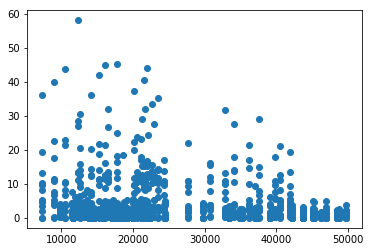

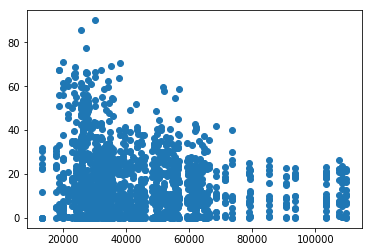

In [3]:
middleeastcountry=['Turkey','Israel','United Arab Emirates','Oman','Kuwait']
northeuropecountry=['Iceland', 'Finland','Denmark','Norway','Sweden']

middleeast=total[total.country.isin(middleeastcountry)]
northeurope=total[total.country.isin(northeuropecountry)]



plt.scatter(middleeast.gdpc,middleeast.suicide_rate)
#middleeast.hist(column="suicide_rate", by="gdpc")
plt.show()
plt.scatter(northeurope.gdpc,northeurope.suicide_rate)
plt.show()
#northeurope.head()

Scatter plot for middle east

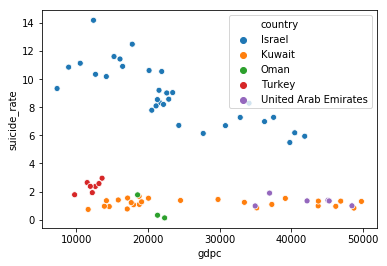

In [4]:
gdp_plot = middleeast.groupby([middleeast.country, middleeast.year]).gdpc.mean()
suicide_rate_plot = middleeast.groupby([middleeast.country, middleeast.year]).suicide_rate.mean()

joint = pd.DataFrame(gdp_plot).join(pd.DataFrame(suicide_rate_plot))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset = joint.reset_index()

sns.scatterplot(joint_reset.gdpc, joint_reset.suicide_rate, hue = joint_reset.country)


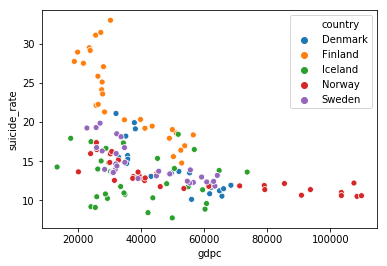

In [5]:
gdp_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).gdpc.mean()
suicide_rate_plot2 = northeurope.groupby([northeurope.country, northeurope.year]).suicide_rate.mean()

joint2 = pd.DataFrame(gdp_plot2).join(pd.DataFrame(suicide_rate_plot2))

#plt.scatter(joint.gdpc, joint.suicide_rate)
joint_reset2 = joint2.reset_index()

sns.scatterplot(joint_reset2.gdpc, joint_reset2.suicide_rate, hue = joint_reset2.country)


In [6]:
oman = middleeast[middleeast['country'] == 'Oman']
oman.head()
oman.groupby(oman.year).gdpc.mean()

year
2009    18557
2010    21337
2014    22328
Name: gdpc, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Fram

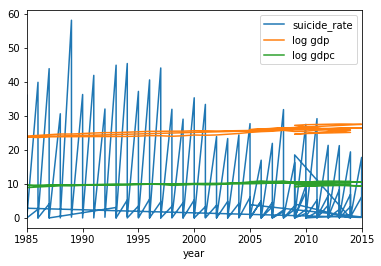

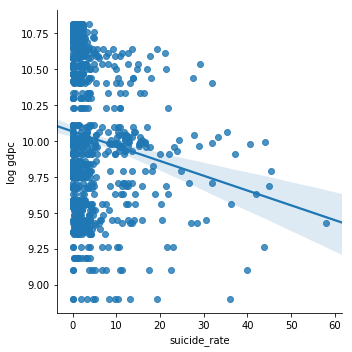

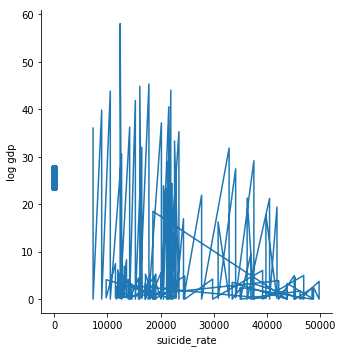

In [7]:
md_gdp=middleeast[['suicide_rate',' gdp_for_year ($) ','gdpc','year']]
md_gdp.index=md_gdp['year']

md_gdp["log suicide"]=np.log(md_gdp["suicide_rate"])
md_gdp["log gdpc"]=np.log(md_gdp["gdpc"])
md_gdp['log gdp']=np.log(md_gdp[' gdp_for_year ($) '])
logplot=md_gdp[["suicide_rate","log gdp",'log gdpc']]
#logplot[md_gdp["suicides/100k pop"]==0]["log suicide"]=0
logplot.plot()
sns.lmplot(x="suicide_rate", y="log gdpc", data=logplot)
sns.lmplot(x='suicide_rate',y='log gdp', data=logplot)
plt.plot(middleeast.gdpc,middleeast.suicide_rate)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

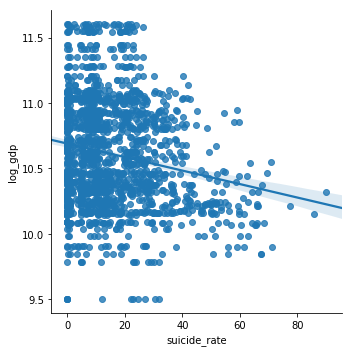

In [8]:
ne_gdp=northeurope[["suicide_rate","gdpc",'year']]
ne_gdp.index=ne_gdp['year']
ne_gdp["log suicide"]=np.log(ne_gdp["suicide_rate"])
ne_gdp["log_gdp"]=np.log(ne_gdp["gdpc"])
nelogplot=ne_gdp[["suicide_rate","log_gdp"]]
#logplot.plot()
#logplot[md_gdp["suicides/100k pop"]==0]["log suicide"]=0
#nelogplot.plot()
sns.lmplot(x="suicide_rate", y="log_gdp", data=nelogplot)

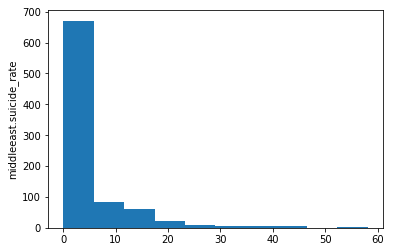

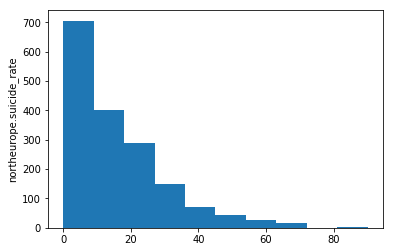

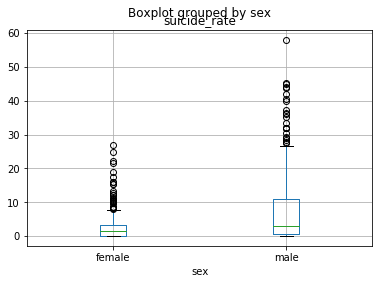

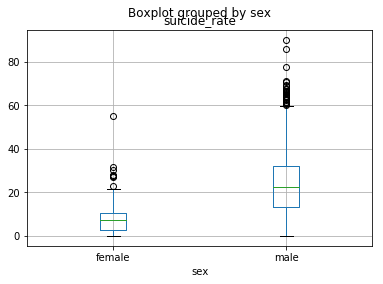

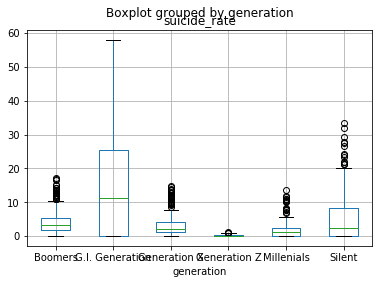

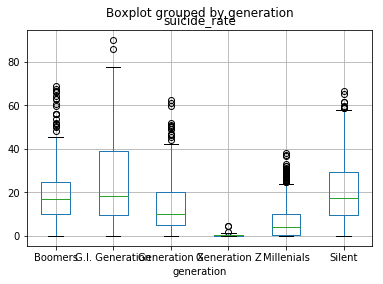

In [9]:
plt.hist(middleeast.suicide_rate)
plt.ylabel('middleeast.suicide_rate')
plt.show()
plt.hist(northeurope.suicide_rate)
plt.ylabel('northeurope.suicide_rate')
plt.show()
middleeast.boxplot(by= "sex",column ="suicide_rate")
northeurope.boxplot(by= "sex",column ="suicide_rate")
middleeast.boxplot(by= "generation",column ="suicide_rate")
northeurope.boxplot(by= "generation",column ="suicide_rate")

In [10]:
HDIdata = pd.read_csv('HDI.csv')
HDIdata = HDIdata.melt('Country')
HDIdata.rename(columns = {'variable':'year', 'value':'HDI'}, inplace=True)
HDIdata['year'] = HDIdata.year.astype(int)
HDIdata['Country'] = HDIdata['Country'].str[1:]
HDIdata.head()

,Country,year,HDI
0,Afghanistan,1990,NaN
1,Albania,1990,0.645
2,Algeria,1990,0.577
3,Andorra,1990,NaN
4,Angola,1990,NaN


In [11]:
data = pd.merge(data, HDIdata,  how='left', left_on=['country', 'year'], right_on = ['Country', 'year'])
data.drop(columns='Country')
data.rename(columns = {'HDI_y':'HDI'}, inplace=True)
data.head()

NameError: name 'data' is not defined